# Code version 0
### * Date Created: 23-03-2021
### * Main Author: Ricardo Luhm
### * Colaborators: -

In [8]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import sympy as sp


In [9]:

### Modified function for Simulation 03
def generate_single_random(n_size,has_triu=True):
    ### Measure the time of a single operation. (Start)
    startt = time()

    ### Randomly generate matrix A, n by n.

    array =np.random.uniform(low=-1.0, high=1.0, size=(n_size,n_size))
    #array = np.random.randn(size=(n_size,n_size))
    if has_triu:
        array=np.triu(array)
    ### Measure the time of a single operation. (End)
    endt = time()
    array_time = endt - startt
    return array, array_time

### Added function for Simulation 03
def generate_ortho(n_size):
    startt = time()
    array = stats.ortho_group.rvs(n_size)
    endt = time()
    ortho_time = endt - startt
    return array, ortho_time

### Added function for Simulation 03 - Question about Diagonal - Is it correct?
def get_diagonal(array):
    ### check here if we need to get the absolute values of the diagonal or 
    ### or just make the diagonal positive keeping its positive
    startt = time()

    diag = np.diagonal(array)
    np.fill_diagonal(array, np.abs(diag))
    ### modify that array making only the diagonal is non negative but keep upper triangular same as input

    endt = time()
    diag_time = endt - startt
    return array, diag_time

### Added function for Simulation 03
def compute_array(upper_true,diag_true):
    startt = time()
    array = upper_true * diag_true
    endt = time()
    compute_time = endt - startt
    return array, compute_time

### Added function for Simulation 03
def decompose_array(array):
    startt = time()
    diag_est, upper_est = np.linalg.qr(array)
    endt = time()
    decomp_time = endt - startt
    return diag_est, upper_est, decomp_time

### Modified function for Simulation 03
def compute_det_norm_cond(array):
    ## Compute abs(det(A)) ##
    ### Measure the time of a single operation. (Start)

    det = np.linalg.det(array)
    abs_det = np.abs(det)

    ## Compute norm_2(A) ##
    norm_2 = np.linalg.norm(array, ord=2)

    ## Compute cond(A) ##
    cond_2 = np.linalg.cond(array, p=2)
    
    return abs_det, norm_2, cond_2

### Modified function for Simulation 03
def compute_single_sim03(n_size):
    
    array, _ = generate_single_random(n_size,has_triu=True) ### array == Upper triang
    ortho, _ = generate_ortho(n_size) ### ortho == Q_true
    diag, _ = get_diagonal(array) ### diag == R_true with positive diagonal
    array, compute_time = compute_array(ortho,diag) ### A = ortho * diag =  Q_true * R_true
    diag_est, ortho_est, decomp_time = decompose_array(array) 
    #diag_est = R_est,  ortho_est = Q_est
    avg_q_error = np.abs(ortho - ortho_est).mean()
    avg_r_error = np.abs(diag-diag_est).mean()

    # A = array, Q_true = ortho, R_true = diag,  Q_est = ortho_est, R_est = diag_est
    sim_03_dict = {"A":[array],"Q_true":[ortho],"R_true":[diag],
                            "Q_est":[ortho_est],"R_est":[diag_est]}

    sim_03_outputs_names = ["abs_det","norm_2","cond_2"]
    sim_03_all_names = []
    sim_03_output_values = []
    for name in sim_03_dict.keys():

        input = sim_03_dict[name][0] ### gets the array within the dictionary
        abs_det, norm_2, cond_2 = compute_det_norm_cond(input)
        temp_list = [abs_det, norm_2, cond_2]

        for idx, out in enumerate(sim_03_outputs_names):
            name_out = name + "_" + out
            sim_03_all_names += [name_out]
            sim_03_output_values += [temp_list[idx]]
    
    sim_03_all_names += ["avg_Q_error"]
    sim_03_output_values += [avg_q_error]
    sim_03_all_names += ["avg_R_error"]
    sim_03_output_values += [avg_r_error]

    sim_03_all_names += ["A_time"]
    sim_03_output_values += [compute_time]
    sim_03_all_names += ["A_decomp_time"]
    sim_03_output_values += [decomp_time]


    return sim_03_all_names, sim_03_output_values

### Modified function for Simulation 03
def generate_multiples_sim03 (n_size_start = 100, n_size_step=100, n_size_max=1100):

    size_range = np.arange(start=n_size_start, stop=n_size_max, step=n_size_step)
    all_results = []

    for idx, n in enumerate(size_range):
        if idx == 0:
            sim_03_all_names, sim_03_output_values = compute_single_sim03(n)
        else:
            _, sim_03_output_values = compute_single_sim03(n)
        all_results.append(sim_03_output_values)

    results_data = np.array(all_results, dtype=np.object)
    results_column = sim_03_all_names

    results_df = pd.DataFrame( results_data, columns = results_column )
    results_df["n_size"] = size_range

    return results_df

def plot_n_sim03(results_df):
    print("#"*30 ,"Ploting Values","#"*30), print("")
    
    columns =  ['A_abs_det', 'A_norm_2', 'A_cond_2', 'Q_true_abs_det', 'Q_true_norm_2',
       'Q_true_cond_2', 'R_true_abs_det', 'R_true_norm_2', 'R_true_cond_2',
       'Q_est_abs_det', 'Q_est_norm_2', 'Q_est_cond_2', 'R_est_abs_det',
       'R_est_norm_2', 'R_est_cond_2', 'avg_Q_error', 'avg_R_error', 'A_time',
       'A_decomp_time', 'n_size']

    twoA = np.array(2,dtype = np.float64)
    sim_03_obj = ["A","Q_true","R_true",
                       "Q_est","R_est"]

    sim_03_outputs_names = ["abs_det","norm_2","cond_2"]

    x = results_df["n_size"]

    for obj in sim_03_obj:
        fig, (ax1, ax2) = plt.subplots(1, 2,sharex=True)
        ax1.set(xlabel='n_size', ylabel='std_scale')
        ax2.set(xlabel='n_size', ylabel='log_scale')

        
        for name in sim_03_outputs_names:
            full_name = obj + "_" + name
            if name == "abs_det":

                mask = results_df[full_name] == np.inf
                idx = results_df[mask].index
                results_df[full_name].iloc[idx] = np.power(twoA,1023) ### hightest value in np.float64

            ax1.plot(x, results_df[full_name],label = full_name)
            ax2.plot(x, results_df[full_name],label = full_name)
            ax2.set_yscale('log')
        fig.suptitle('Simple vs Log Scale plot ## {} ##'.format(obj))
        fig.tight_layout()                    
        plt.legend() 
        plt.show()
        print("#"*30 ,"END","#"*30), print("")

    ### ERROR PLOT
    fig, (ax1, ax2) = plt.subplots(1, 2,sharex=True)
    ax1.set(xlabel='n_size', ylabel='std_scale')
    ax2.set(xlabel='n_size', ylabel='log_scale')
    fig.suptitle('Simple vs Log Scale plot ## "Errors" ##')
    ax1.plot(x, results_df['avg_Q_error'],label = 'avg_Q_error')
    ax1.plot(x, results_df['avg_R_error'],label = 'avg_R_error')
    ax2.plot(x, results_df['avg_Q_error'],label = 'avg_Q_error')
    ax2.plot(x, results_df['avg_R_error'],label = 'avg_R_error')
    ax2.set_yscale('log')
    fig.tight_layout()
    plt.legend() 
    plt.show()
    print("#"*30 ,"END","#"*30), print("")

    ### TIME PLOT

    fig, (ax1, ax2) = plt.subplots(1, 2,sharex=True)
    ax1.set(xlabel='n_size', ylabel='std_scale')
    ax2.set(xlabel='n_size', ylabel='log_scale')
    fig.suptitle(' Simple vs Log Scale plot ## "Times (seconds)" ##')
    ax1.plot(x, results_df['A_time'],label = "A_time")
    ax1.plot(x, results_df['A_decomp_time'],label = "A_decomp_time")
    ax2.plot(x, results_df['A_time'],label = "A_time")
    ax2.plot(x, results_df['A_decomp_time'],label = "A_decomp_time")
    ax2.set_yscale('log')
    fig.tight_layout()
    plt.legend() 
    plt.show()
    print("#"*30 ,"END","#"*30), print("")


In [10]:
n_size =10

array, array_time = generate_single_random(n_size,has_triu=True)

print(array.shape)
if array[0,0]>0:
    array[0,0] = array[0,0]*(-1)

sp.Matrix(array)


(10, 10)


Matrix([
[-0.594868254999531, 0.115580210083522, -0.177735883860879, -0.106091518143019, -0.653017614696829, -0.120654001728316,   0.534201925798037, -0.422521230499956, -0.696780265684673,  0.774511817940202],
[               0.0, 0.843850881472807, -0.659287573133605,  0.694999487559834, -0.553128334983258,  0.300901177310301,   0.869605399733304,  0.327764398708222, -0.250890079800109,   0.25476694421724],
[               0.0,               0.0,  0.255745497373517,  0.225226112967217,  0.577832708691391, -0.126910893684021,  -0.123321342469563,  0.915745037578329, -0.191323948541636,  0.582242186799821],
[               0.0,               0.0,                0.0,  0.223521609097171, -0.919010917215797, -0.345310206621023,  0.0955917918652882, -0.610257262320512,  -0.22941551308923, -0.158466321326586],
[               0.0,               0.0,                0.0,                0.0,  0.385254352695512, -0.868073931255563,  -0.409439095269096, -0.991188723823681, -0.720817908583265,   

In [11]:
ortho, ortho_time = generate_ortho(n_size)

print(ortho.shape)
sp.Matrix(ortho)


(10, 10)


Matrix([
[  0.264025130569769,   0.588913909668622,  0.0149939658833717, -0.178964447395228,   0.380530294106077, -0.0206135636778699,    0.10472545395921,   0.0290974681501623,  -0.289735024431272,   0.556982363724547],
[  -0.54122973607714, -0.0160008925268809,   0.260830419033837, -0.143925978374489,   0.443619833705774,  -0.289779307341148,  -0.309658723267399,    0.350742537205454,   -0.28032276805656,  -0.199516513270785],
[ -0.147950625510338,   0.329625209014446,   -0.37554934228399,  0.135216429355557, -0.0760083606670742,  -0.256028095351152,  -0.602842132386737,   -0.523411505116176,  0.0241288101625318, -0.0291366862703204],
[  0.503270809464004,  0.0698846720430189, -0.0307891628735477, -0.608872785623372,  -0.281464976445455,  -0.199539590781291,  -0.278011563244879,    0.239421784314741, -0.0898119907845224,  -0.329306222665267],
[ -0.425372705278627,   0.423259376680877,  -0.297975814557536, 0.0327763207171977,  -0.553159850859686, -0.0036960035955569,    0.224358602431

In [12]:
darray, diag_time = get_diagonal(array)

print(darray.shape)
sp.Matrix(darray)


(10, 10)


Matrix([
[0.594868254999531, 0.115580210083522, -0.177735883860879, -0.106091518143019, -0.653017614696829, -0.120654001728316,  0.534201925798037, -0.422521230499956, -0.696780265684673,  0.774511817940202],
[              0.0, 0.843850881472807, -0.659287573133605,  0.694999487559834, -0.553128334983258,  0.300901177310301,  0.869605399733304,  0.327764398708222, -0.250890079800109,   0.25476694421724],
[              0.0,               0.0,  0.255745497373517,  0.225226112967217,  0.577832708691391, -0.126910893684021, -0.123321342469563,  0.915745037578329, -0.191323948541636,  0.582242186799821],
[              0.0,               0.0,                0.0,  0.223521609097171, -0.919010917215797, -0.345310206621023, 0.0955917918652882, -0.610257262320512,  -0.22941551308923, -0.158466321326586],
[              0.0,               0.0,                0.0,                0.0,  0.385254352695512, -0.868073931255563, -0.409439095269096, -0.991188723823681, -0.720817908583265,   0.69303570

In [13]:

results_df = generate_multiples_sim03(n_size_start = 100, n_size_step=100, n_size_max=1100)

############################## Ploting Values ##############################



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


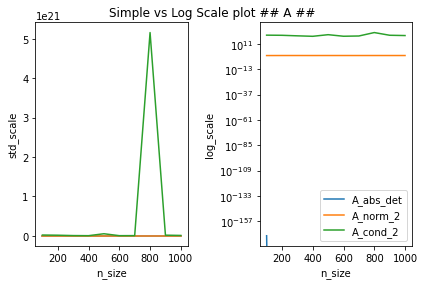

############################## END ##############################



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


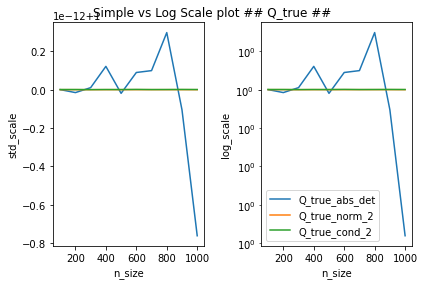

############################## END ##############################



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


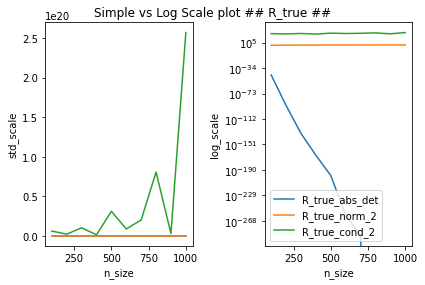

############################## END ##############################



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


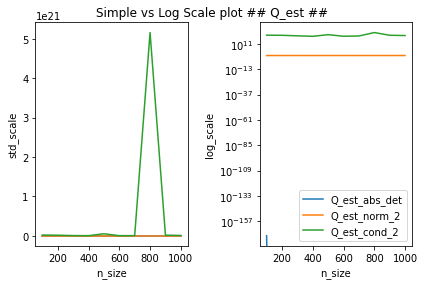

############################## END ##############################



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


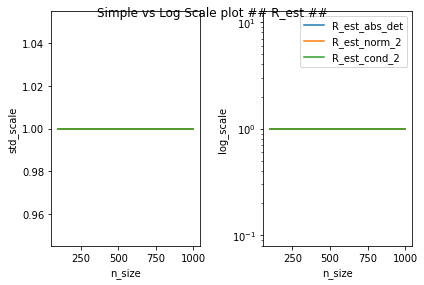

############################## END ##############################



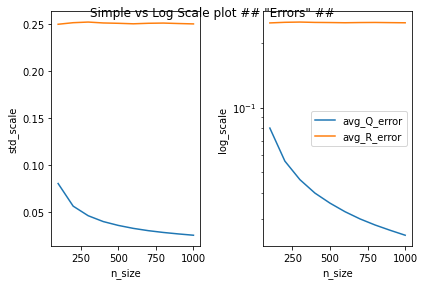

############################## END ##############################



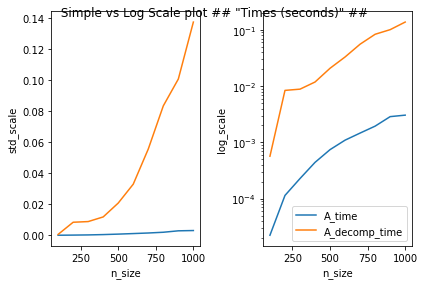

############################## END ##############################



In [14]:
plot_n_sim03(results_df)


In [15]:

#results_df.to_csv("simulation03.csv")
